In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import pickle
import pylab as plt
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

In [12]:
### balancing function
"""
function: dist_balancing
Inputs:
    data: original dataset
    bins: histogram bins of the variable to be balanced
    binsize: size of each bin
    label: name of the variable
    slabel: name of the sensitive attribute of interest
Output:
    balanced dataset
"""
def dist_balancing(data, bins, binsize, label, slabel):
    ros = RandomOverSampler(random_state=42)
    dfs = []
    for b in bins[1:]:
        dfb=data[(data[label]<b)&(data[label]>=b-binsize)]
        if(len(dfb[slabel].unique())==1):
            continue
        ## random over sampling based on sensitive attribute distribution
        dfb_res,gender_res=ros.fit_resample(dfb, dfb[slabel].tolist())
        dfs.append(pd.DataFrame(dfb_res,columns=dfb.keys().tolist()))
    df_res=pd.concat([dfi for dfi in dfs],ignore_index=True)
    
    return df_res

### Example on FirstImpression Data

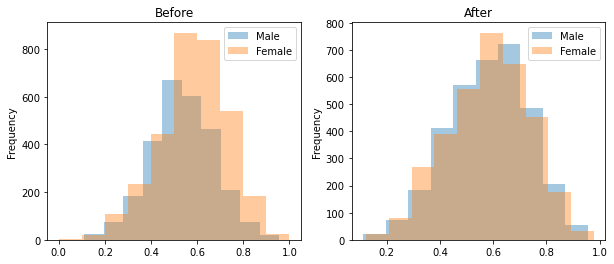

In [16]:
filepath='../../FirstImpression/'
df_train_info=pd.read_csv(filepath+'eth_gender_annotations_dev.csv',sep=';')

f = open(filepath+'annotation_training.pkl','rb')
df_train_label = pickle.load(f, encoding='latin1')

df_train=df_train_info.copy()

for label in ['extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'interview', 'openness']:
    ann=[]
    vid=df_train_info['VideoName'].tolist()
    dfi=df_train_label[label]
    for i in vid:
        if(i in dfi.keys()):
            ann.append(df_train_label[label][i])
        else:
            ann.append(np.nan)
    df_train[label]=ann
df_train=df_train.dropna()

data = df_train
bins=np.arange(0,1.1,0.1) #range of target variable (can customize the bin size based on your data)
binsize = 0.1
label = 'openness'
slabel = 'Gender'

df_res = dist_balancing(data, bins, binsize, label, slabel)
## plot the distribution
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
data[data['Gender']==1][label].plot(kind ='hist',alpha=0.4,label='Male')
data[data['Gender']==2][label].plot(kind ='hist',alpha=0.4,label='Female')
plt.title("Before")
plt.legend()

plt.subplot(1,2,2)
df_res[df_res['Gender']==1][label].plot(kind ='hist',alpha=0.4,label='Male')
df_res[df_res['Gender']==2][label].plot(kind ='hist',alpha=0.4,label='Female')
plt.title("After")
plt.legend()
plt.show()